# Practica N° 1

**1\.** ¿Cuáles de las siguientes ecuaciones modela la distribución de temperatura en una barra delgada ?

a) La ecuación del calor

**2\.** Un metodo es estable cuando: 

a) Al introducir un error en una etapa del proceso, este 

**3\.** ¿Cuáles de las siguientes ecuaciones diferenciales no es de tipo parabólico?

d) $u_{xx} + u_{tt} = 0$ es eliptica, ya que $b^2 - 4ac = 0 - 4(1)(1) < 0$

**4\.** La ecuación diferencial parciale de conducción del calor se clasifica como:

a) Parabólica

**5\.** La ecuación de diferencias de la ecuación del calor es estable cuando $r \leq 0.5$

Verdadero

**6\.** Para resolver numéricamente la ecuación del calor también se puede usar el método de Crank Nicolson 

Verdadero

**7\.** La solución numérica de la ecuación del calor se puede obtener fácilmente implementando numéricamente el algoritmo de la ecuación de diferencias de la ecuación del calor

Verdadero

**8\.** Resolver el siguiente problema :

<p>
$$
\begin{align*}    
\begin{cases}
 \dfrac{\partial u}{\partial t} = 0.9 \dfrac{\partial^2 u}{\partial x^2} & \text{para } (x,t) \in [0,1]\times\langle0,T]\\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = \sin(\pi x) & \text{para } x\in[0,1]    \\
 u(0,t) = 0 = u(1,t)  & \text{para } t\in\langle0,T]
\end{cases} 
\end{align*}
$$
</p>

Usar el tiempo $T = 0.3$ seg, con $h = 0.1$ m, $k = 0.1$ seg. Usar el método explícito. ¿ Es buena la aproximación ?. La solución a este problema es $u(x,t) = e^{-0.9\pi^2t}\sin(\pi x)$

Importamos los modulos necesarios

In [57]:
import metodos as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

obtenemos la solución

In [58]:
solutions = mt.metodoExplicito(0.9, 1, 0.3, 0.1, 0.1, lambda x: np.sin(np.pi*x), lambda x: 0, lambda x: 0)

comparamos los resultados para $t = 0.3$ del metodo explicito y la solución analítica.  

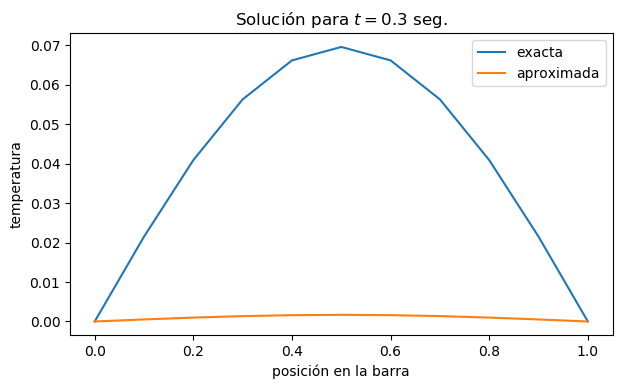

In [59]:
xs = np.linspace(0,1,11)
t = 0.3

#solución analítica
sol = np.exp(-0.9*(np.pi**2)*t)*np.sin(np.pi*xs)

fig = plt.figure(figsize=(7.0,4.0), dpi=100)
ax = fig.add_subplot(111)

ax.plot(xs, sol, label="exacta")
ax.plot(xs, solutions[-1], label="aproximada")

ax.set_title("Solución para $t = 0.3$ seg.")
ax.set_xlabel("posición en la barra")
ax.set_ylabel("temperatura")
ax.legend()

plt.show()


podemos apreciar de la grafica que la solución aproximada no es buena, ahora veamos esto pero en numeros.

**Tabla para los valores de $t=0.3$ seg.**

In [60]:
def comparar(x, sol_aprox, sol_exac):
    
    error = abs(sol_exac - sol_aprox)

    error_por = np.divide(error, sol_exac, 
                          out = np.zeros_like(error), 
                          where = np.round(sol_exac,6) != 0.0)*100 

    data = {"posición":x,
            "sol. exacta": np.round(sol_exac, 6),
            "sol. aprox.": np.round(sol_aprox, 6),
            "error": np.round(error, 6),
            "error %": np.round(error_por,2)}

    tabla = pd.DataFrame(data)
    tabla = tabla[["posición", "sol. exacta", "sol. aprox.", "error", "error %"] ]
    return tabla

comparar(xs, solutions[-1], sol)

,posición,sol. exacta,sol. aprox.,error,error %
0,0.0,0.000000,0.000000,0.000000,0.00
1,0.1,0.021512,0.000521,0.020991,97.58
2,0.2,0.040918,0.000991,0.039927,97.58
3,0.3,0.056319,0.001364,0.054955,97.58
4,0.4,0.066207,0.001603,0.064603,97.58
5,0.5,0.069614,0.001686,0.067928,97.58
6,0.6,0.066207,0.001603,0.064603,97.58
7,0.7,0.056319,0.001364,0.054955,97.58
8,0.8,0.040918,0.000991,0.039927,97.58
9,0.9,0.021512,0.000521,0.020991,97.58


En general vemos que el error porcentual para todas las posiciones de la barra es de $97.58 \%$, esto denota una mala aproximación a la solución exacta.

**9\.** Resulva la ecuación del calor:

$$
\begin{align*}    
\begin{cases}
 \dfrac{\partial u}{\partial t} = C^2 \dfrac{\partial^2 u}{\partial x^2} & \\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = \sin(\pi x) + \sin(3\pi x) & \text{para } x\in[0,1]    \\
 u(0,t) = 0 = u(1,t)  & \text{para } t>0
\end{cases} 
\end{align*}
$$

Considere $C=1$, el tiempo final $T=0.4$ seg, la cantidad de intervalos, $m = 10$ (partición para $x$), $n = 100$ (partición para el tiempo). Use el método explicito. ¿ Es buena la aproximación ?

In [61]:
solutions = mt.metodoExplicito(1, 1, 0.4, 0.1, 0.004, 
                               lambda x: np.sin(np.pi*x) + np.sin(3*np.pi*x),
                               lambda x: 0,
                               lambda x: 0) 

**Grafica de la solución aproximada**

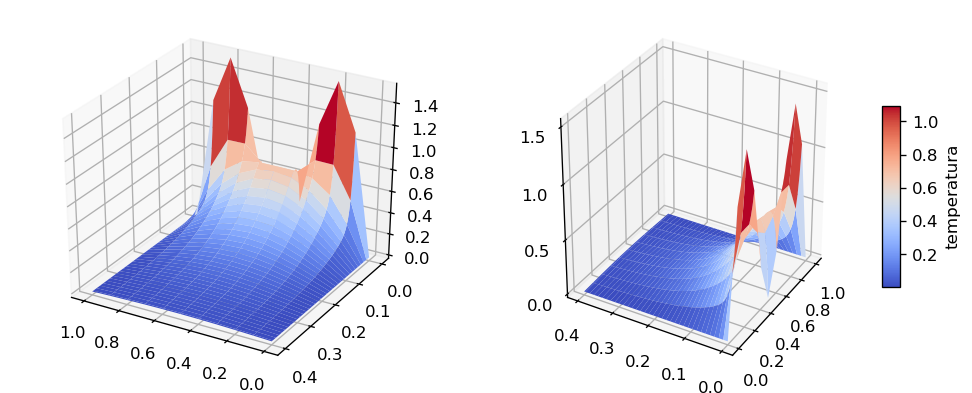

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = np.linspace(0, 1, 11)
t = np.linspace(0, 0.4, 101)
x,t = np.meshgrid(x,t)

fig = plt.figure(figsize=(10.0,4.0), dpi=120)
ax01 = fig.add_subplot(121, projection="3d")
ax02 = fig.add_subplot(122, projection="3d")

surf01 = ax01.plot_surface(x, t, solutions, cmap = cm.coolwarm)
ax01.view_init(30, 120)

surf02 = ax02.plot_surface(x, t, solutions, cmap = cm.coolwarm)
ax02.view_init(30, 210)

fig.colorbar(surf01, shrink=0.5, aspect=10, label="temperatura")

plt.show()

La solución de esta ecuación es :

$$u(x,t) = \sin(\pi x)e^{-\pi^2t} + \sin(3\pi x)e^{-9\pi^2t} $$

A continuación vamos a comparar los resultados de la solución exacta con la aproximada, mediante una animación 

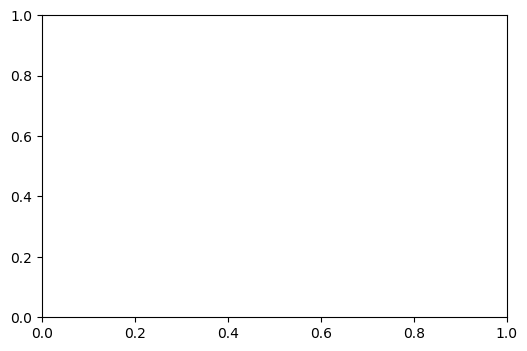

In [63]:
import matplotlib.animation as animation
from IPython.display import HTML 

fig = plt.figure(figsize=(6.0,4.0), dpi=100)
ax = fig.add_subplot(111)

x = np.linspace(0,1,11)
t = np.linspace(0,0.4,101)

In [64]:
y,s = np.meshgrid(x,t)

def u(x,t):
    return np.sin(np.pi*x)*np.exp(-(np.pi**2) * t) + np.sin(3*np.pi*x)*np.exp(-9*(np.pi**2)*t)

sol = u(y,s)

def init():
    ax.plot([], [])
    ax.set_ylim(0, 1.5)
    ax.grid()
    ax.set_ylabel("Temperatura")
    ax.set_xlabel("Posición en la barra")
    ax.set_title("Variación de la temperatura en una barra")

def animate(i):
    del ax.lines[:]
    ax.plot(x, solutions[i], color="blue", label="aprox. $t = {0:.2f}$ seg.".format(t[i]))
    ax.plot(x, sol[i] , color="red", label = "exacta $t = {0:.2f}$ seg.".format(t[i]))
    ax.legend()
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=101, interval=120, repeat=True)

HTML(anim.to_html5_video())

Podemos apreciar que al inicio se notan leves diferencias en la temperatura de la solución exacta y aproximada pero al transcurrir del tiempo estas tienden a igualarse, por lo tanto se intuye que es una buena aproximación.

Ahora comparemos las soluciones numericamente para $t=0.4$ seg.

In [65]:
comparar(x, sol[-1], solutions[-1])

,posición,sol. exacta,sol. aprox.,error,error %
0,0.0,0.000000,0.000000,0.000000,0.00
1,0.1,0.005693,0.005963,0.000270,4.74
2,0.2,0.010828,0.011342,0.000514,4.74
3,0.3,0.014904,0.015611,0.000707,4.74
4,0.4,0.017521,0.018352,0.000831,4.74
5,0.5,0.018422,0.019296,0.000874,4.74
6,0.6,0.017521,0.018352,0.000831,4.74
7,0.7,0.014904,0.015611,0.000707,4.74
8,0.8,0.010828,0.011342,0.000514,4.74
9,0.9,0.005693,0.005963,0.000270,4.74


La aproximación es buena ya que el error porcentual es de $4.74 \%$, lo cual indica un indice bajo de error.